<img src="../Images/DSC_Logo.png" style="width: 400px;">

# Plot Types Using Matplotlib & Seaborn

This notebook explores various plotting techniques using Matplotlib and Seaborn to visualize relationships within data, analyze distributions, and enhance comparisons through innovative graphical representations.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Pairwise Data

## 1.1 Line Plot: Time Series 

### **Example 1: Antarctic CO2 concentrations**

The time series in the ["Antarctic Ice Cores Revised 800KYr CO2 Data" dataset](https://www.ncei.noaa.gov/access/paleo-search/study/17975) represents the concentrations of atmospheric carbon dioxide (CO2) as reconstructed from ice cores extracted from various sites in Antarctica, spanning a period of 800,000 years before present (BP).

Columns in the dataset:
- age_gas_calBP: The age of the gas sample, expressed in calendar years before present (BP), where "present" is defined as the year 1950 AD.
- co2_ppm: The concentration of carbon dioxide measured in parts per million (ppm) from the ice core sample.
- co2_1s_ppm: The one standard deviation of the CO2 measurement in parts per million (ppm), indicating the uncertainty or variability associated with the CO2 concentration value.

**Original dataset:**
Bereiter, B., S. Eggleston, J. Schmitt, C. Nehrbass-Ahles, T. F. Stocker, H. Fischer, S. Kipfstuhl, J. Chappellaz. 2015. Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. Geophysical Research Letters, 42(2), 542-549. doi: 10.1002/2014GL061957                   

In [46]:
# Load dataset
path = '../Datasets/antarctica/antarctica2015co2composite-noaa.txt' 
co2_antarctica = pd.read_csv(path, 
                 skiprows=142,
                 sep="\t")

In [47]:
print(co2_antarctica.head())

   age_gas_calBP  co2_ppm  co2_1s_ppm
0         -51.03   368.02        0.06
1         -48.00   361.78        0.37
2         -46.28   359.65        0.10
3         -44.41   357.11        0.16
4         -43.08   353.95        0.04


In [48]:
print(co2_antarctica.tail())

      age_gas_calBP  co2_ppm  co2_1s_ppm
1896      803925.28   202.92        2.06
1897      804009.87   207.50        0.92
1898      804522.67   204.86        1.64
1899      805132.44   202.23        0.69
1900      805668.87   207.29        2.20


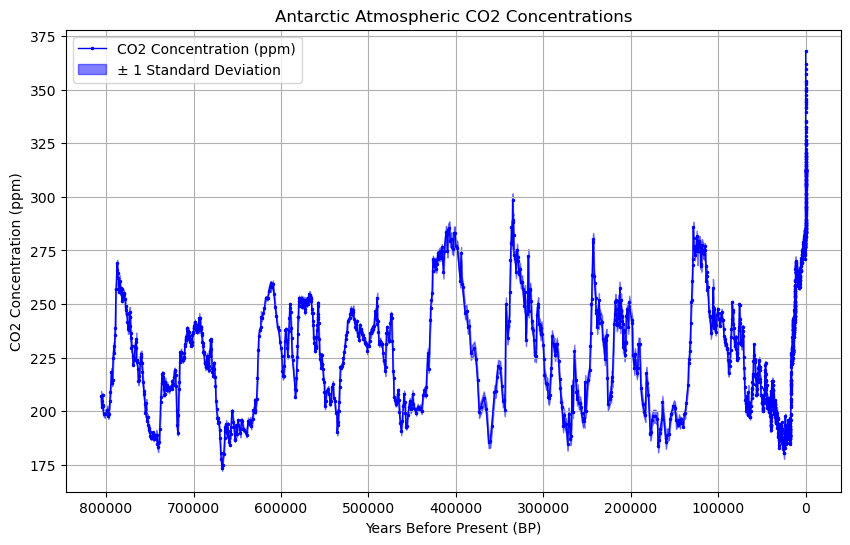

In [49]:
# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Plot CO2 concentrations over time with markers
plt.plot(co2_antarctica['age_gas_calBP'], co2_antarctica['co2_ppm'],
         marker='o', 
         linewidth=1, 
         markersize=1.5,
         color='blue',
         label='CO2 Concentration (ppm)')

# Fill in the area to show uncertainty around the CO2 concentration
plt.fill_between(co2_antarctica['age_gas_calBP'], 
                 co2_antarctica['co2_ppm'] - co2_antarctica['co2_1s_ppm'], 
                 co2_antarctica['co2_ppm'] + co2_antarctica['co2_1s_ppm'], 
                 color='blue', alpha=0.5, label='± 1 Standard Deviation')

# Invert the x-axis to show the most recent years on the left
plt.gca().invert_xaxis()

# Set the title and labels
plt.title('Antarctic Atmospheric CO2 Concentrations')
plt.xlabel('Years Before Present (BP)')
plt.ylabel('CO2 Concentration (ppm)')

# Show the legend for the plot
plt.legend()

# Add a grid for better readability
plt.grid()

# Display the plot on the screen
plt.show()

### **Example 2: Modern CO2 concentrations**

The CO2 levels measured at the Mauna Loa Observatory in Hawaii constitute one of the longest continuous records of atmospheric carbon dioxide. This dataset is the basis for the [Keeling Curve](https://doi.org/10.3402/tellusa.v28i6.11322                  ), a graph that depicts the persistent rise of CO2 concentrations in Earth's atmosphere since 1958. The data was downloaded from [here](https://gml.noaa.gov/ccgg/trends/data.html) in monthly resolution.

In [50]:
# Load dataset
path = '../Datasets/co2_mm_mlo.csv' 
co2_modern = pd.read_csv(path, 
                 skiprows=40,
                 sep=",")
print(co2_modern.head())

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99


In [51]:
# Get datetime date
co2_modern["date"] = co2_modern["year"].astype(str) + "-" + co2_modern["month"].astype(str)
co2_modern["date"] = pd.to_datetime(co2_modern["date"], format="%Y-%m")
print(co2_modern.head())

   year  month  decimal date  average  deseasonalized  ndays  sdev   unc  \
0  1958      3     1958.2027   315.71          314.44     -1 -9.99 -0.99   
1  1958      4     1958.2877   317.45          315.16     -1 -9.99 -0.99   
2  1958      5     1958.3699   317.51          314.69     -1 -9.99 -0.99   
3  1958      6     1958.4548   317.27          315.15     -1 -9.99 -0.99   
4  1958      7     1958.5370   315.87          315.20     -1 -9.99 -0.99   

        date  
0 1958-03-01  
1 1958-04-01  
2 1958-05-01  
3 1958-06-01  
4 1958-07-01  


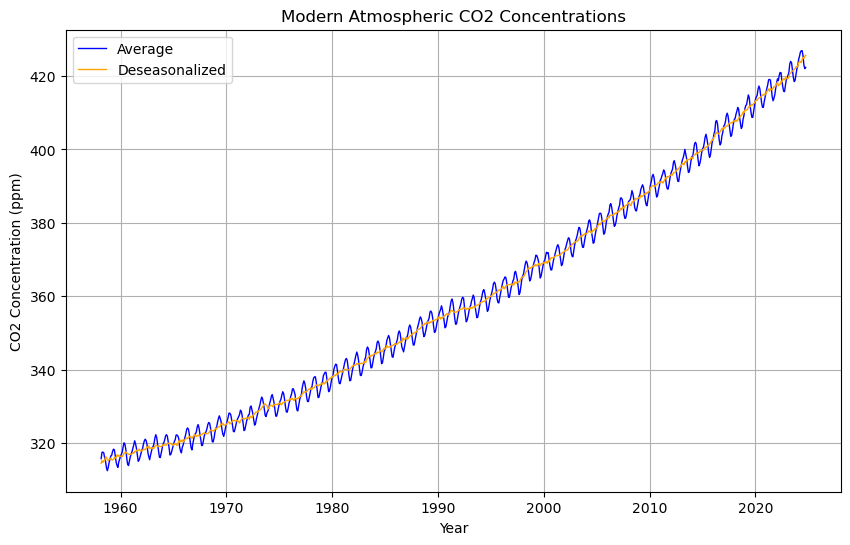

In [52]:
# Create a figure for the plot
plt.figure(figsize=(10, 6))

# Plot average CO2 concentrations over time with markers
plt.plot(co2_modern['date'], co2_modern['average'], 
         linewidth=1, 
         color='blue', 
         label='Average')

# Plot deseasonalized CO2 concentrations over time with markers
plt.plot(co2_modern['date'], co2_modern['deseasonalized'], 
         linewidth=1, 
         color='orange', 
         label='Deseasonalized')

# Set the title and labels
plt.title('Modern Atmospheric CO2 Concentrations')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (ppm)')
plt.legend()

# Add a grid for better readability
plt.grid()

# Display the plot on the screen
plt.show()

**Exercise:** Create a figure that compares atmospheric CO2 concentrations from the Antarctic ice core data and modern measurements from the Mauna Loa Observatory by plotting both lines in the same figure. Additionally, highlight the maximum pre-industrial CO2 level in the figure by adding a [`axhline`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axhline.html). Save the figure after layout customizations of your choice to the folder "Figures".

Preparation:

In [53]:
# Convert the modern CO2 dataset to years after 1950
co2_modern['relative_year'] = (co2_modern['year'] - 1950) * -1
    # Check end years of datasets
print(co2_antarctica['age_gas_calBP'].min() - 1950)
print(co2_modern['relative_year'].min() - 1950)

# Filter antarctica data to get max CO2 before industrialization
pre_industrial_mask = co2_antarctica['age_gas_calBP'] > 200 # 1950 (BP level in the dataset) - 1750 (start industrialization)
max_pre_industrial_co2 = co2_antarctica.loc[pre_industrial_mask, 'co2_ppm'].max() 

-2001.03
-2024


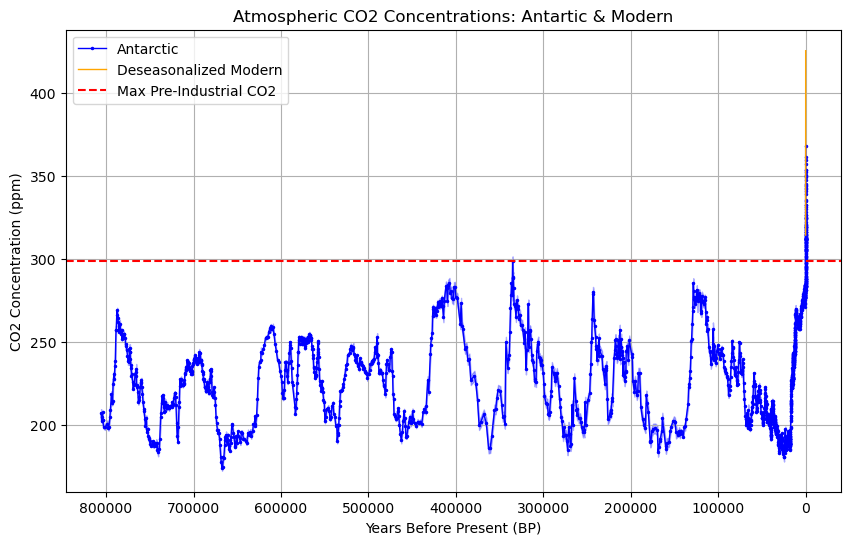

In [54]:
# Create a new figure for the combined plot
plt.figure(figsize=(10, 6))

# Plot CO2 concentrations from Antarctic ice cores
plt.plot(co2_antarctica['age_gas_calBP'], co2_antarctica['co2_ppm'],
         marker='o',
         linewidth=1,
         markersize=1.5,
         color='blue',
         label='Antarctic')

# Fill in the area to show uncertainty around the Antarctic CO2 concentration
plt.fill_between(co2_antarctica['age_gas_calBP'], 
                 co2_antarctica['co2_ppm'] - co2_antarctica['co2_1s_ppm'], 
                 co2_antarctica['co2_ppm'] + co2_antarctica['co2_1s_ppm'], 
                 color='blue', alpha=0.3)

# Plot deseasonalized CO2 concentrations from modern data
plt.plot(co2_modern['relative_year'], co2_modern['deseasonalized'], 
         linewidth=1, 
         color='orange', 
         label='Deseasonalized Modern')

# Add a horizontal dashed line for the maximum CO2 concentration before industrialization
plt.axhline(y=max_pre_industrial_co2, color='red', linestyle='--', label='Max Pre-Industrial CO2')

# Invert the x-axis to show the most recent years on the left
plt.gca().invert_xaxis()

# Set the title and labels
plt.title('Atmospheric CO2 Concentrations: Antartic & Modern')
plt.xlabel('Years Before Present (BP)')
plt.ylabel('CO2 Concentration (ppm)')

# Show the legend
plt.legend()

# Add a grid for better readability
plt.grid()

# Save the figure to a file
plt.savefig('Figures/co2_concentrations.png', dpi=300, bbox_inches='tight')

# Display the plot on the screen
plt.show()

## 1.2 Scatter Plot

### **Example 3: Chemical concentrations in volcanic tephra**

The dataset consists of extensive analyses of volcanic glass compositions from tephra layers produced by the Campi Flegrei caldera volcano over the last 15,000 years. It includes glass composition analyses from multiple eruptions, highlighting the diverse chemical characteristics of the ash deposits, which are essential for dating and correlating tephra across various archaeological and geological sites in the Mediterranean region.

Variables in "majors" are given in weight percent (wt%). Variables in "traces" are given in parts per million (ppm).

**Dataset and parts of code (modified) derived from:**
Petrelli, Maurizio. Introduction to python in earth science data analysis: from descriptive statistics to machine learning. Springer Nature, 2021.

**Original dataset:**
Smith, V. C., Isaia, R., and Pearce, N.: Tephrostratigraphy and glass compositions of post-15 kyr Campi Flegrei eruptions: implications for eruption history and chronostratigraphic markers, Quaternary Science Reviews, 30, 3638–3660, doi:10.1016/j.quascirev.2011.07.012,                  2011.

In [55]:
# Load dataset from two excel sheets
path = '../Datasets/Smith_glass_post_NYT_data.xlsx'
majors = pd.read_excel(path)
traces = pd.read_excel(path, sheet_name=1)

In [56]:
print(majors.head())

   Analysis no.  Stat. pos.     Eruption  controlcode_old  controlcode Epoch  \
0             1          66  Monte Nuovo                0            0   NaN   
1             2          66  Monte Nuovo                0            0   NaN   
2             3          66  Monte Nuovo                0            0   NaN   
3             4          66  Monte Nuovo                0            0   NaN   
4             5          66  Monte Nuovo                0            0   NaN   

  Analysis label  Date of analysis    NA2O     MGO  ...     SIO2     K2O  \
0        cf96_16            190110  6.3971  0.2198  ...  56.2717  7.0660   
1         cf96_5            190110  6.6347  0.2542  ...  56.5634  7.1067   
2         cf96_7            190110  6.8884  0.2251  ...  57.2084  7.1163   
3        cf96_10            190110  6.8803  0.1845  ...  57.2269  7.1568   
4         cf96_1            190110  6.9742  0.2103  ...  57.1543  7.2609   

      CAO    TIO2     MNO     FEO   P2O5      Cl   F    Total 

In [57]:
print(traces.head())

   Analysis no.  Strat. Pos.   Eruption  controlcode Sample    Epoch  \
0          1915           63  Astroni 7            1     79  three-b   
1          1916           63  Astroni 7            1     79  three-b   
2          1917           63  Astroni 7            1     79  three-b   
3          1918           63  Astroni 7            1     79  three-b   
4          1919           63  Astroni 7            1     79  three-b   

   Crater size Date of analysis  Si/bulk cps  SiO2* (EMP)  ...        Ho  \
0           20         100210am    20.213469        59.27  ...  1.109360   
1           20         100210am    11.918930        59.27  ...  1.082349   
2           20         100210am    17.056423        59.27  ...  1.249954   
3           20         100210am    24.520596        59.27  ...  1.241248   
4           20         100210am    14.345882        59.27  ...  1.084048   

         Er        Tm        Yb        Lu        Hf        Ta         Pb  \
0  3.255033  0.469786  2.799824  0

### Compositions against time (eruption events):

Preparation:

In [58]:
# Define the desired order for the epochs: oldest (left) to youngest (right)
epochs = ['one', 'two', 'three', 'three-b']
majors['Epoch'] = pd.Categorical(majors['Epoch'], categories=epochs, ordered=True)

# Sort based on the epoch order
majors = majors.sort_values('Epoch')

# Define oxide columns to plot in individual subplots
oxide_columns = ['SIO2', 'CAO', 'FEO', 'MGO', 'P2O5', 'Cl']

Figure with subplots - individual plots for each variable:

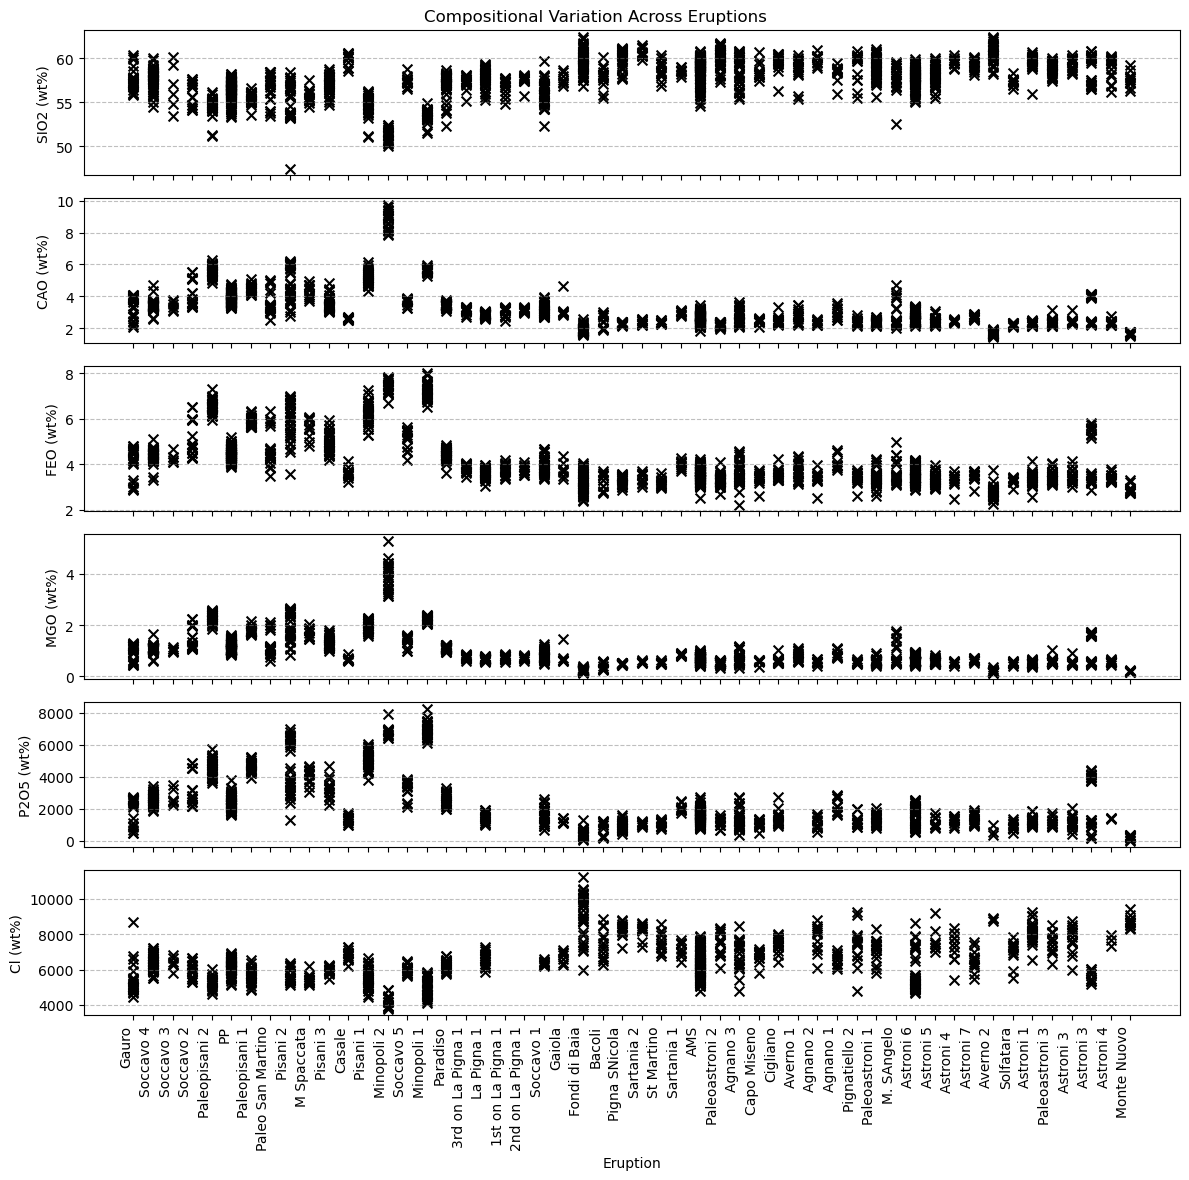

In [59]:
# Set up the figure with subplots
fig, axes = plt.subplots(len(oxide_columns), 1, figsize=(12, 12), sharex=True) # shared x axis
fig.subplots_adjust(hspace=0.1) # space between subplots

# Loop over each oxide to create individual plots
for i, oxide in enumerate(oxide_columns):
    ax = axes[i]
    
    # Plot data with crosses as markers
    ax.scatter(majors['Eruption'], majors[oxide],
               s=50,
               color='black',
               marker='x')
    
    # Set the y-axis label
    ax.set_ylabel(f'{oxide} (wt%)')
    
    # Add horizontal grid lines
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.5)

# Rotate x-axis labels for clarity
plt.setp(axes[-1].get_xticklabels(), rotation=90, ha="right")
axes[-1].set_xlabel('Eruption')

# Title for the overall plot
fig.suptitle('Compositional Variation Across Eruptions')

# Adjust to tight layout
plt.tight_layout()  

# Show the plot
plt.show()

### Relationship between two continious variables:

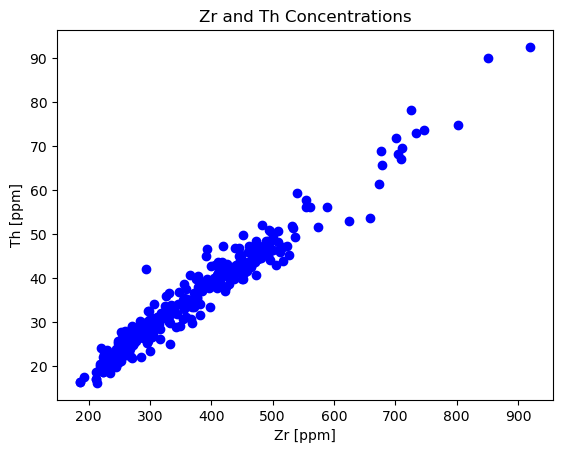

In [60]:
# Create a scatter plot
fig, ax = plt.subplots()

# Plot
ax.scatter(traces['Zr'], traces['Th'], color='blue') # Zirconium vs. Thorium

# Set the title and labels
plt.title("Zr and Th Concentrations")
plt.xlabel("Zr [ppm]")
plt.ylabel("Th [ppm]")
plt.show()

### Conditioning on other variables

Understanding the distribution of a variable often leads to questions about how it varies with other variables. The `hue` parameter in seaborn adds color to plots based on a categorical variable, differentiating data points by category.

Preparation:

In [61]:
# Define the color mapping for each epoch
color_map = {'one':'red', 'two':'blue', 'three':'purple', 'three-b':'orange'}

In [62]:
majors['Epoch'].unique()

['one', 'two', 'three', 'three-b', NaN]
Categories (4, object): ['one' < 'two' < 'three' < 'three-b']

Plots using matplotlib and seaborn:

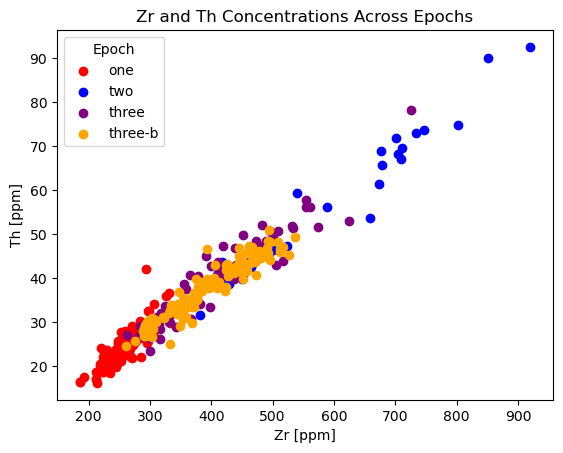

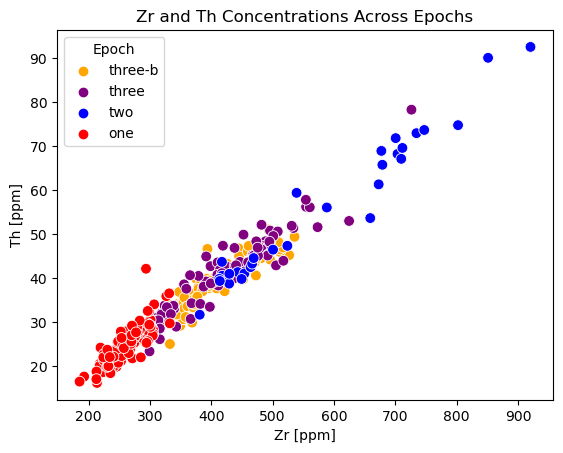

In [63]:
# 1. Scatter plot with matplotlib:

# Create a scatter plot
fig, ax = plt.subplots()

# Plot
for epoch in color_map.keys():
    ax.scatter(traces.loc[traces.Epoch == epoch, 'Zr'], traces.loc[traces.Epoch == epoch, 'Th'], 
               color=color_map[epoch], 
               label=epoch)
    ax.legend()

# Set the title and labels
plt.title("Zr and Th Concentrations Across Epochs")
plt.xlabel("Zr [ppm]")
plt.ylabel("Th [ppm]")
plt.legend(title='Epoch')
plt.show()

# ---

# 2. Scatter plot with seaborn:

# Plot
plt.figure()
sns.scatterplot(data=traces,
                x='Zr',
                y='Th',
                hue='Epoch', 
                palette=color_map,
                marker='o',
                s=60)

# Set the title and labels
plt.title("Zr and Th Concentrations Across Epochs")
plt.xlabel("Zr [ppm]")
plt.ylabel("Th [ppm]")
plt.legend(title='Epoch')
plt.show()

## 2. Data Distributions

While all the plots in this notebook can also be created using matplotlib alone, seaborn, which is specifically designed for statistical data visualization, makes many plotting processes easier and more straightforward. However, seaborn limit detailed customization options and can be slower with very large datasets since it depends on matplotlib.

Seaborn `displot` is a function in seaborn used to create distribution plots of a variable, including histograms, kernel density estimates (KDE), and other distributions. It handles both univariate and bivariate distributions and can easily incorporate `hue` for categorical differentiation using color.

### **Example 3 [continued]: Chemical concentrations in volcanic tephra**

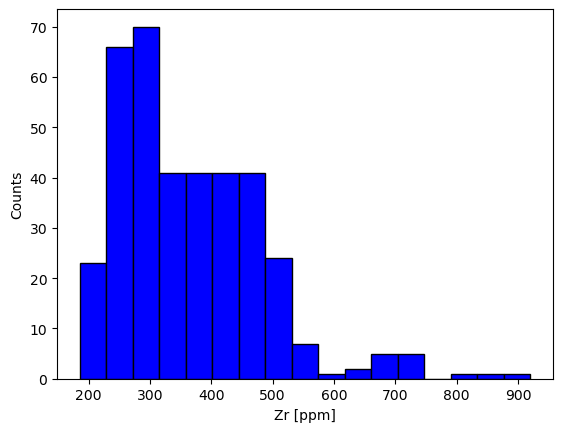

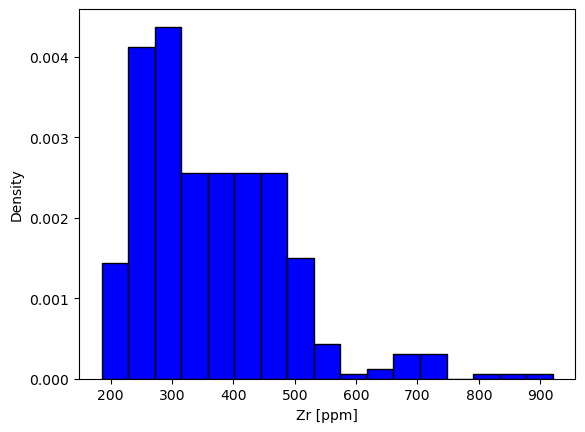

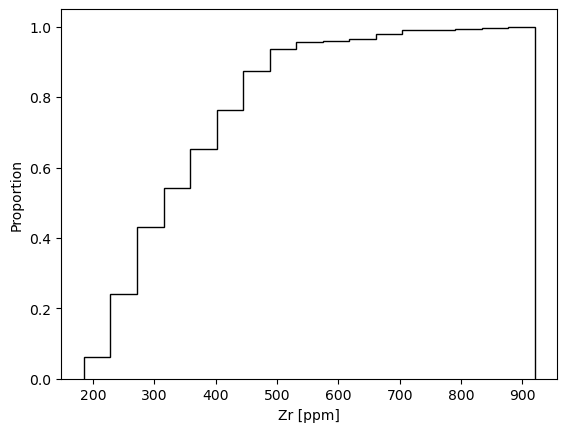

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


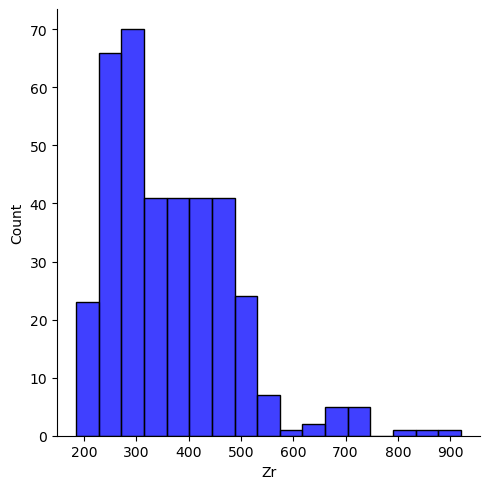

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


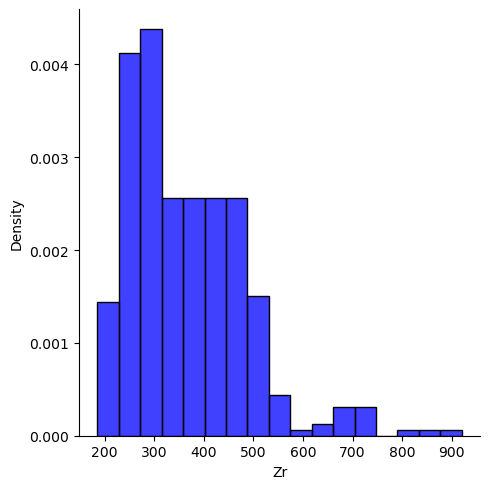

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


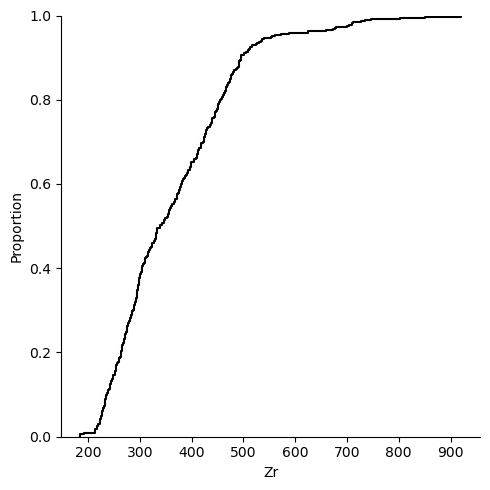

In [64]:
# 1. Using matplotlib:
# Plot counts:
plt.figure()
plt.hist(traces['Zr'],
         bins='auto',
         edgecolor='black',
         color='blue')
plt.xlabel('Zr [ppm]')
plt.ylabel('Counts')
plt.show()

# Plot probability density:
plt.figure()
plt.hist(traces.Zr,
         bins='auto',
         edgecolor='black',
         color='blue',
         density=True)
plt.xlabel('Zr [ppm]')
plt.ylabel('Density')
plt.show()

# Cumulative probability:
plt.figure()
plt.hist(traces.Zr,
         bins='auto',
         edgecolor='black',
         color='blue',
         density=True,
         cumulative=1,
         histtype='step')
plt.xlabel('Zr [ppm]')
plt.ylabel('Proportion')
plt.show()

# 2. Creating similar plots using seaborn:
# Plot counts:
sns.displot(traces, 
            x="Zr",
            edgecolor='black',
            color='blue')
plt.show()

# Plot probability density:
sns.displot(traces,
            x="Zr",
            edgecolor='black',
            color='blue',
            stat="density")
plt.show()

# Cumulative probability:
sns.displot(traces,
            x="Zr",
            color='black',
            kind="ecdf")
plt.show()

### Choosing the bin size in histograms

The size of the bins in a histogram matters because using the wrong size can hide important patterns in the data or make random noise look significant. While tools like `displot` and `histplot` (included in `displot`) in seaborn automatically set a default bin size based on the data, it should be verified that findings remain consistent when changing the bin size. In seaborn, adjustments are possible, for example,  with the `binwidth` or the `bins` parameters.

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


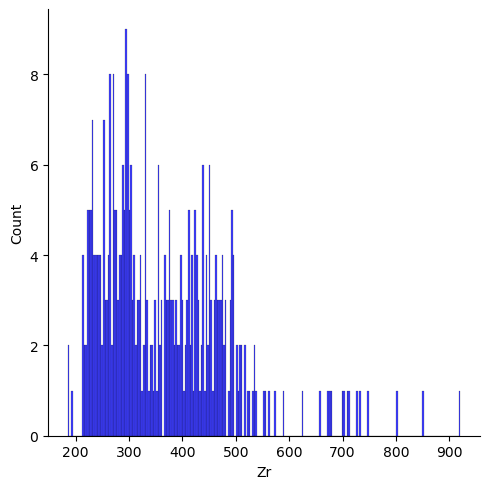

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


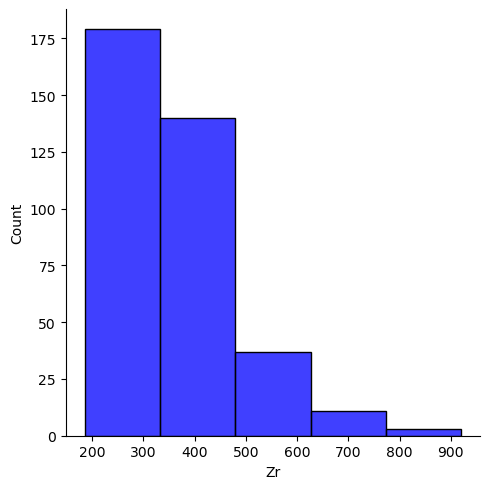

In [65]:
# Using binwidth
sns.displot(traces,
            x="Zr",
            edgecolor='black',
            color='blue',
            binwidth=3) 
plt.show()

# Using bins
sns.displot(traces,
            x="Zr",
            edgecolor='black',
            color='blue',
            bins=5) 
plt.show()

### Choosing smoothing

Kernel Density Estimation (KDE) is a statistical method for estimating the probability density function of a random variable, creating a smooth curve that visualizes the distribution of data points. Finding the right smoothing level is crucial, as excessive smoothing can obscure important details, while too little can create a cluttered appearance. The bandwidth (`bw_adjust`) can be adjusted to test different representations. In the following code block, a KDE curve is added to the histplot; and selected as plot type on its own using `kind`.

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


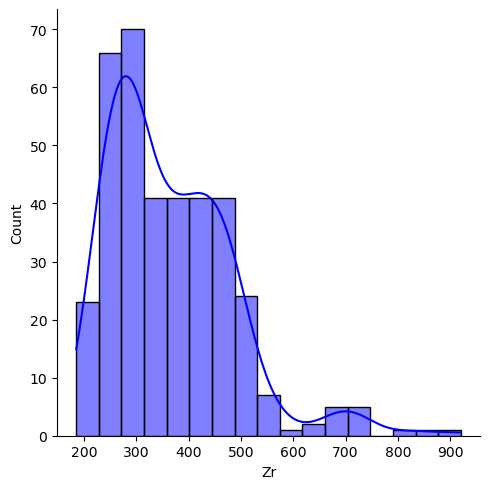

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


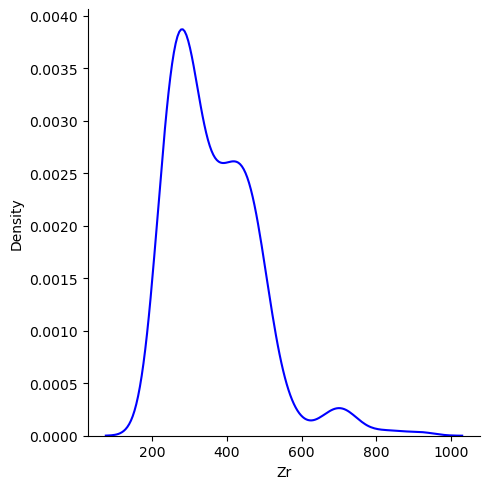

In [66]:
# KDE overlay
sns.displot(traces,
            x="Zr",
            edgecolor='black',
            color='blue',
            kde=True,
            fill=True)
plt.show()

# KDE plot
sns.displot(traces,
            x="Zr",
            color='blue',
            kind='kde')
plt.show()

### Plotting many distributions made easy with seaborn

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

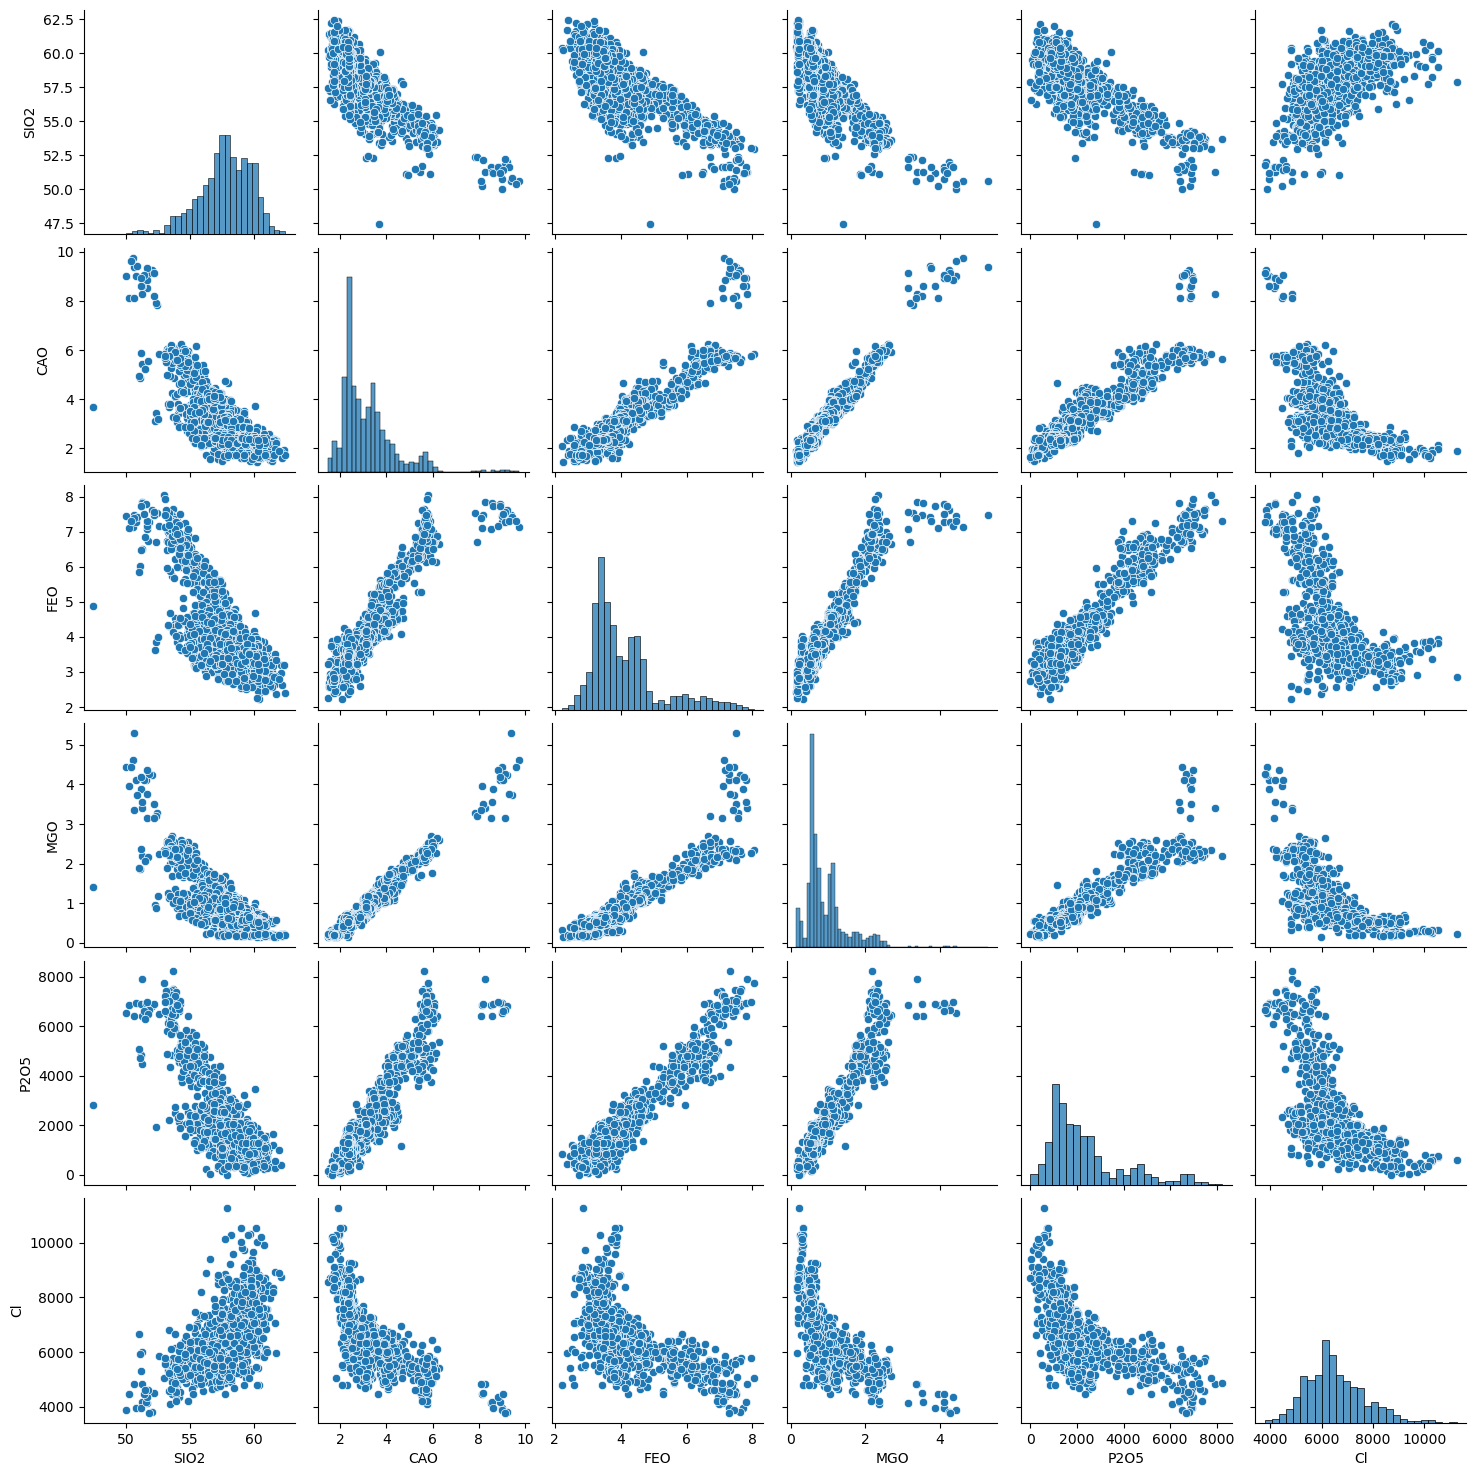

In [67]:
sns.pairplot(majors[oxide_columns])
plt.show()

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarnin

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldco

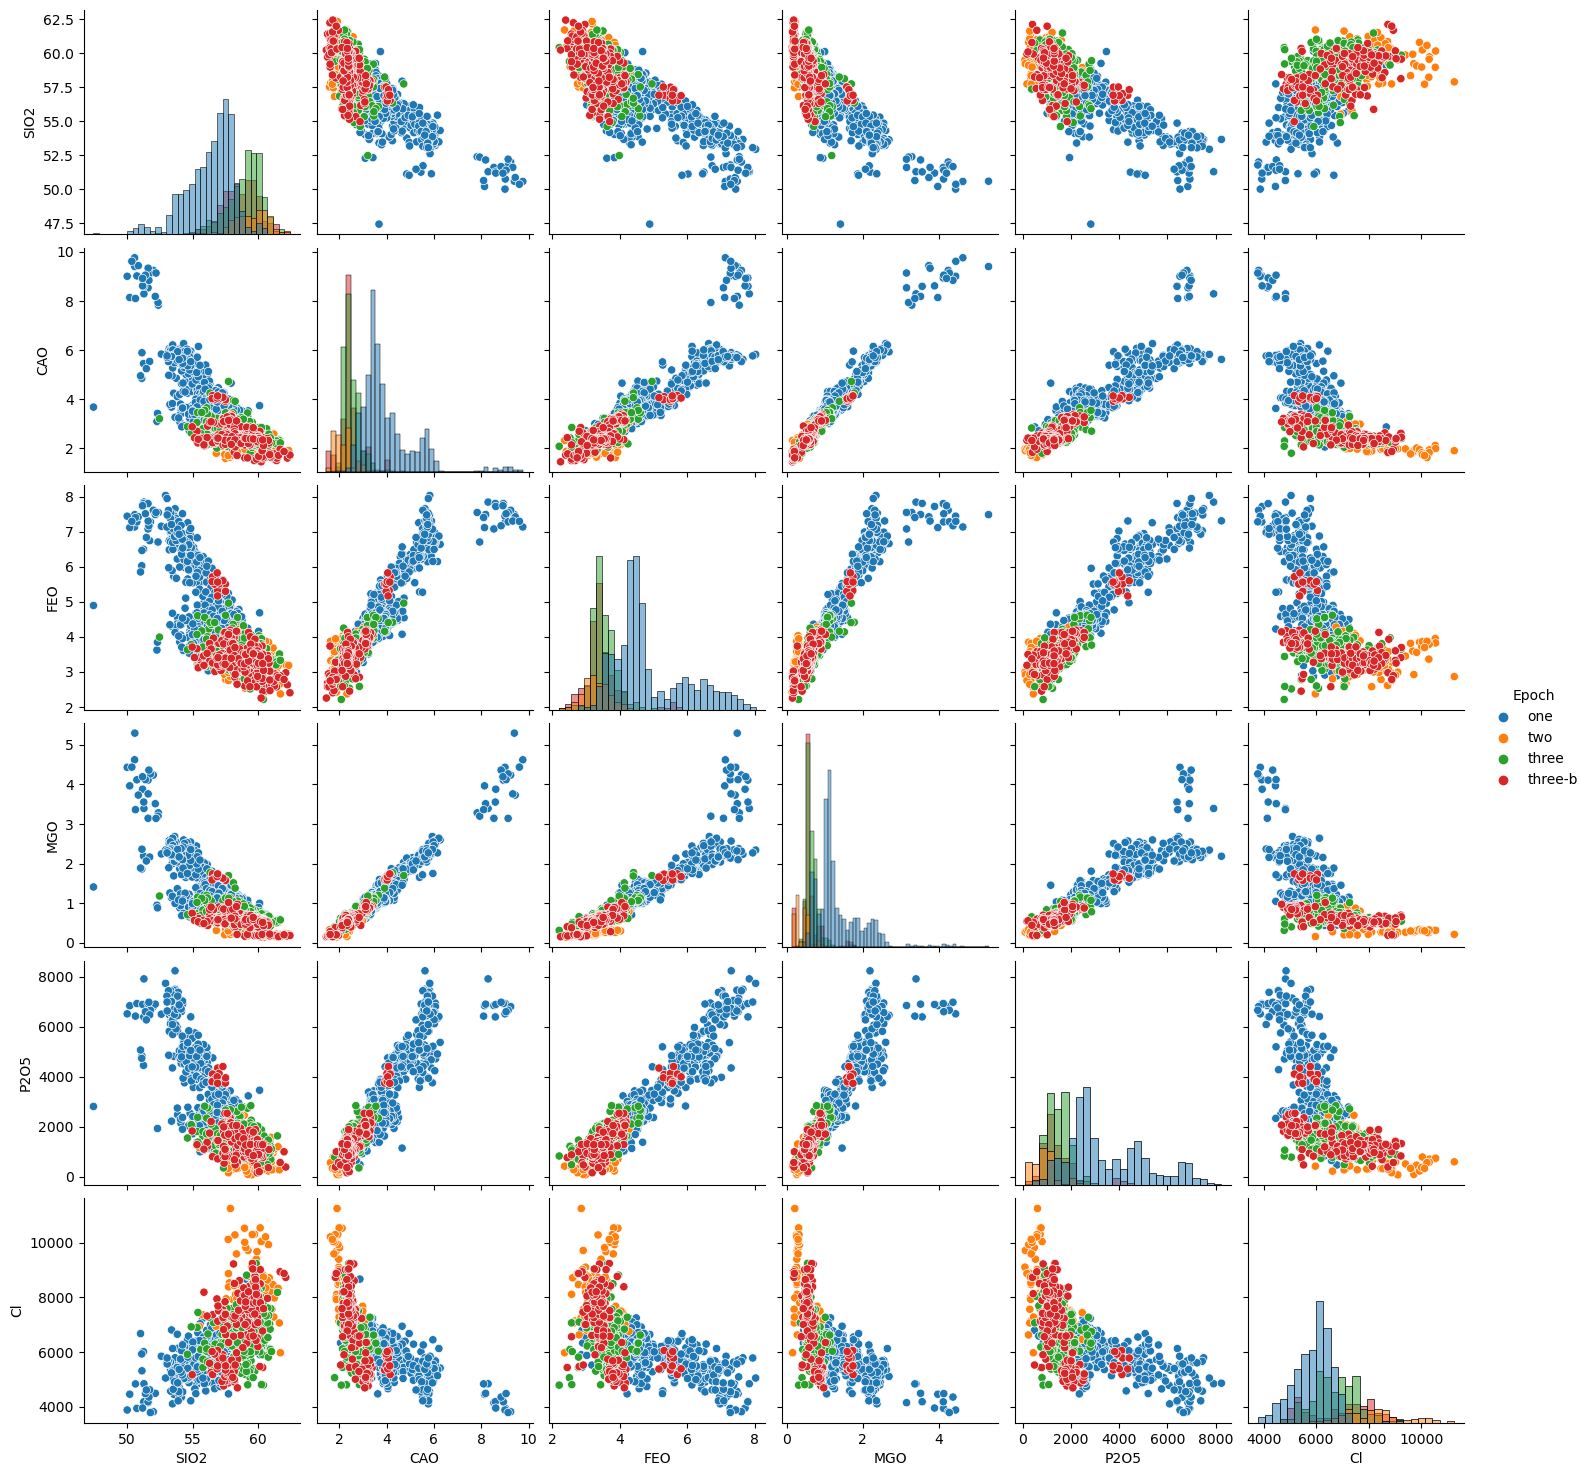

In [68]:
sns.pairplot(majors[oxide_columns + ['Epoch']],
             hue='Epoch',
             diag_kind='hist')
plt.show()

### **Example 4: Palmer Penguins**
<img src="../Images/penguins.png" style="width: 400px;">

*Artwork by @allison_horst*

Seaborn as other libraries offers some teaching datasets and we here want to import the "penguin" dataset which contains data of three different species of penguins, collected from three islands in the Palmer Archipelago, Antarctica.

In [69]:
# Load dataset directly from seaborn
penguins = sns.load_dataset("penguins")
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,Female
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,Male
46,Adelie,Dream,41.1,19.0,182.0,3425.0,Male
235,Gentoo,Biscoe,49.3,15.7,217.0,5850.0,Male
115,Adelie,Biscoe,42.7,18.3,196.0,4075.0,Male


**Exercise:** Create two separate figures representing the distribution of body mass from the penguin dataset. The first figure should be a histogram showing the distribution of body mass for all penguin species in a single plot, with color coding for species and a Kernel Density Estimate (KDE) overlay. Similarly plot the distribution of body mass categorized by island. Ensure both plots are correctly labeled and save the figure to the folder "Figures". While many tutorials are available online for the penguins dataset, try to use only this notebook for this exercise. You may want to explore additional analyses and visualizations with the dataset once you have completed the exercise.

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

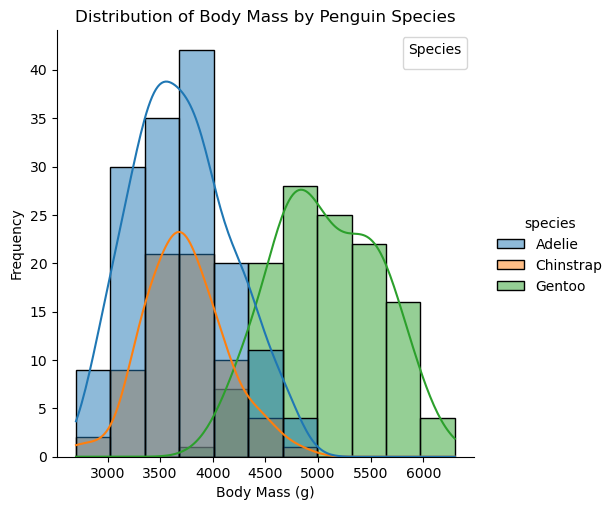

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a

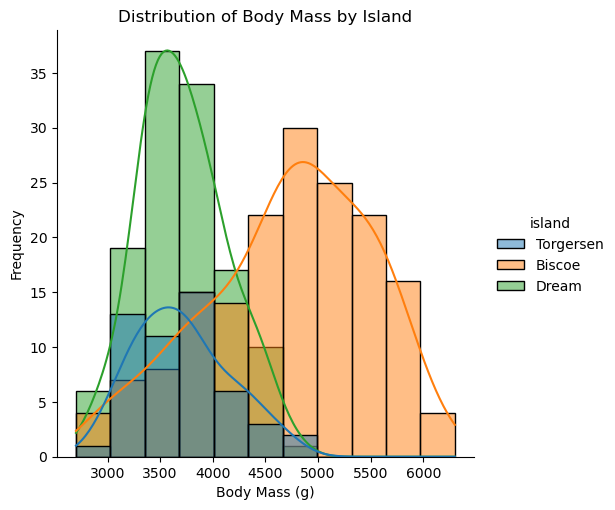

In [70]:
# 1. Distribution of body mass by species
sns.displot(penguins,
            x='body_mass_g',
            hue='species',
            #kind='hist', # is default
            kde=True,
            fill=True)
plt.title('Distribution of Body Mass by Penguin Species')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.legend(title='Species')  # Ensure the title starts with a capital letter
plt.savefig('Figures/penguins_body_mass_by_species.png', bbox_inches='tight')
plt.show()

# 2. Distribution of body mass by island
sns.displot(penguins,
            x='body_mass_g',
            hue='island',
            #kind='hist', # is default
            kde=True,
            fill=True)
plt.title('Distribution of Body Mass by Island')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.savefig('Figures/penguins_body_mass_by_island.png', bbox_inches='tight')
plt.show()

## 3. Comparing Distributions Categorical

As the size of the dataset grows, categorical scatter plots or histograms become limited in the information they can provide about the distribution of values within each category. When this happens, there are several approaches for summarizing the distributional information in ways that facilitate easy comparisons across the category levels.

Similar to `displot` for distribution plots, seaborn `catplot` is a function for creating categorical plots. It combines various types of plots (e.g. box plots - also individually accessible using seaborn `boxplot` function) in a single interface, enabling comparison of categorical data across different groups.

## 3.1 Boxplots & Violinplots

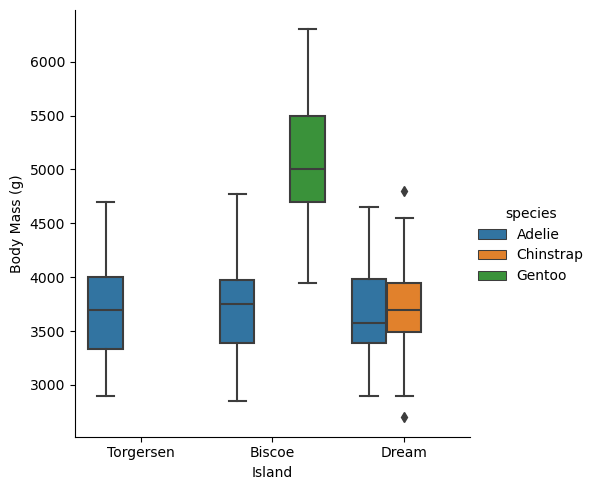

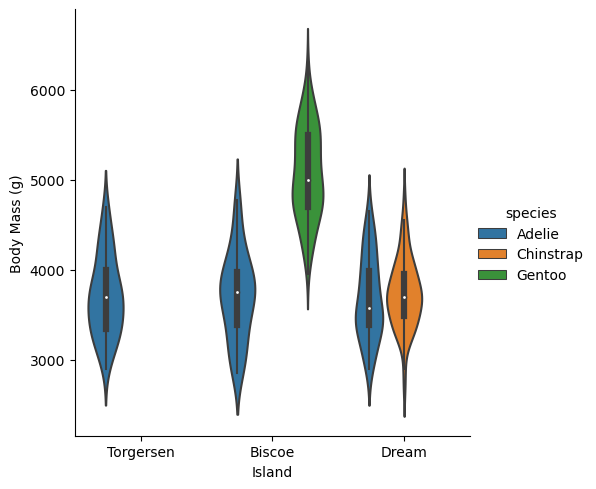

In [71]:
# Create a catplot with boxplot kind
sns.catplot(x='island',
            y='body_mass_g',
            hue='species',
            data=penguins,
            kind='box')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

# Create a catplot with violinplot kind (combine boxplot with the kernel density estimation)
sns.catplot(x='island',
            y='body_mass_g',
            hue='species',
            data=penguins,
            kind='violin')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

### Multiple Columns as Categories

Assuming we want to create a unified boxplot where all specified numerical characteristics are plotted together on the same x-axis. Melting the dataframe transforms it from a wide format (where each characteristic is in its own column) to a long format, where we have a single column containing the values for all oxide components.

In [72]:
# Define columns used as categories
penguin_variables = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Melt the DataFrame to long format for plotting
penguins_long = pd.melt(penguins, id_vars='species', value_vars=penguin_variables, 
                         var_name='variable', value_name='value')
print(penguins_long.sample(5))

     species           variable  value
469   Adelie      bill_depth_mm   19.0
26    Adelie     bill_length_mm   40.6
103   Adelie     bill_length_mm   37.8
677   Gentoo      bill_depth_mm   16.3
1014  Gentoo  flipper_length_mm  210.0


We create a combined boxplot for all penguin measurements across species ... but encounter a common issue when (visually) comparing multiple variables: differing scales.

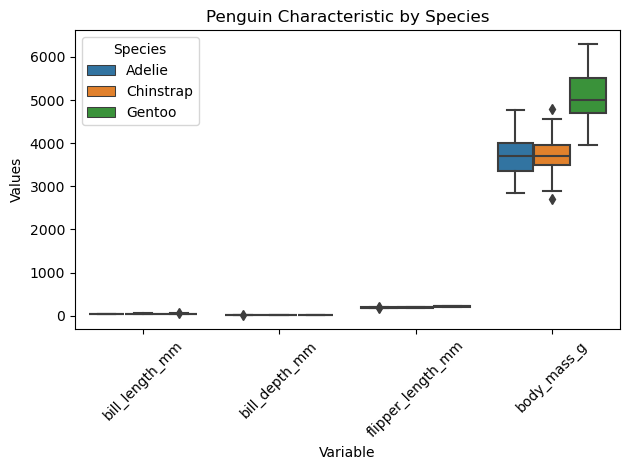

In [73]:
plt.figure()
sns.boxplot(x='variable',
            y='value',
            hue='species',
            data=penguins_long)

# Add titles and labels
plt.title('Penguin Characteristic by Species')
plt.xlabel('Variable')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Species')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

`body_mass_g` values are much larger than the values of the other variables. Therefore, `body_mass_g` shall be displayed on a secondary y-axis for clarity. 

To explicitly specify which matplotlib axes to draw a plot on requires using the `ax` parameter. 

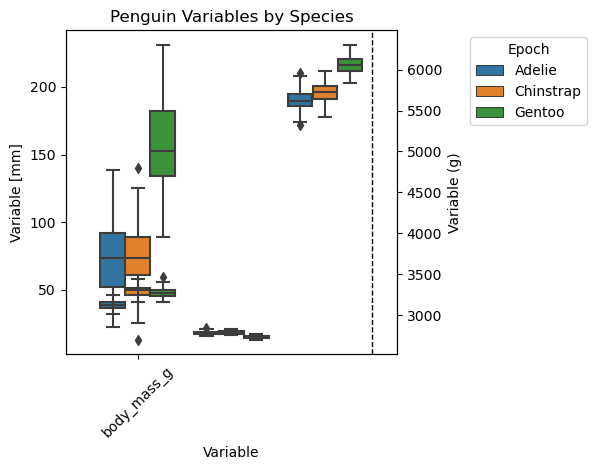

In [74]:
# Lists of variables for each axis
left = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
right = ['body_mass_g']

# Create the primary boxplot
plt.figure()

# Data for primary axis
ax = sns.boxplot(x='variable',
                 y='value',
                 hue='species',
                 data=penguins_long[penguins_long['variable'].isin(left)])  

# Create a secondary axis
ax2 = ax.twinx()

# Data for secondary axis: body_mass_g
sns.boxplot(x='variable',
            y='value',
            hue='species',
            data=penguins_long[penguins_long['variable'].isin(right)], 
            ax=ax2)

# Drawing a vertical line between the two y-axes
ax.axvline(x=2.5, color='k', linestyle='--', linewidth=1)  # Adjust x-position as necessary

# Handle legend
ax.get_legend().remove() # remove
ax2.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Epoch', loc='upper left', bbox_to_anchor=(1.2, 1)) # Position the legend outside the plot

# Add titles and labels
plt.title('Penguin Variables by Species')
ax.set_xlabel('Variable')
ax.set_ylabel('Variable [mm]')  # Label for primary axis
ax2.set_ylabel('Variable (g)')  # Label for secondary axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Combine Plots: Violinplot & Swarmplot

C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\annika\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


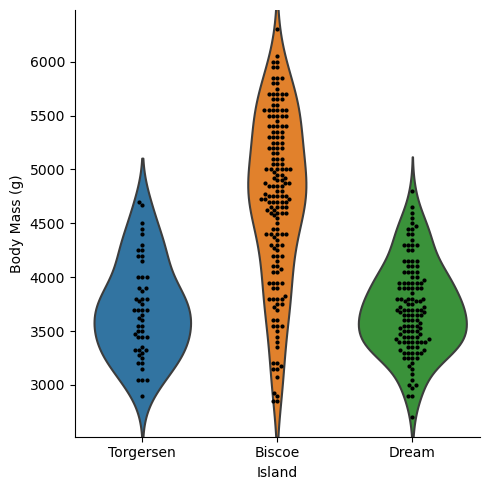

In [75]:
# Create the violin plot with catplot
g = sns.catplot(x='island',
                y='body_mass_g',
                data=penguins,
                kind='violin',
                inner=None)

# Overlay the swarm plot on top of the violin plot
sns.swarmplot(x='island',
              y='body_mass_g',
              data=penguins,
              color="k",
              size=3,
              ax=g.ax)  # Use g.ax to overlay 

# Set axis labels
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

### **Example 3 [continued]: Chemical concentrations in volcanic tephra**

**Exercise:** Create a combined boxplot visualization that displays the distribution of various oxide components from the 'majors' dataset, categorized by epochs. The boxplot should clearly differentiate the values for each oxide based on the specified epochs. This requires a long format of the dataset and two y-axes similar to the combined boxplot visualization of the penguin data. Use the variable SIO2 for the primary axis and the variables specified in 'right' for the secondary axis. Ensure both plots are correctly labeled and save the figure to the folder "Figures". 

Preparation:

In [76]:
# Define oxide columns
oxide_columns = ['SIO2', 'CAO', 'FEO', 'MGO', 'P2O5', 'Cl']

# Lists of variables for each axis
left = ['SIO2']
right = ['CAO','FEO','MGO']

# Melt the DataFrame to long format for plotting
majors_long = pd.melt(majors, id_vars='Epoch', value_vars=oxide_columns, 
                       var_name='variable', value_name='value')
print(majors_long.sample(5))

         Epoch variable        value
3648       one      FEO     4.402800
10412  three-b       Cl  5430.000000
7782       one     P2O5          NaN
8864   three-b     P2O5   860.000000
9253       one       Cl  5064.021314


Plot:

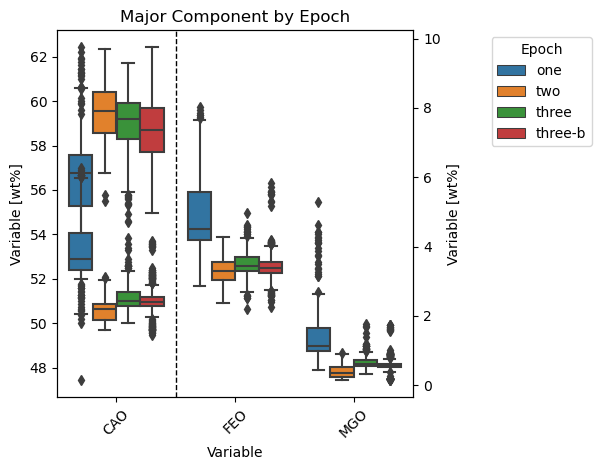

In [77]:
# Create the primary boxplot
plt.figure()

# Data for primary axis
ax = sns.boxplot(x='variable',
                 y='value',
                 hue='Epoch',
                 data=majors_long[majors_long['variable'].isin(left)])  

# Create a secondary axis
ax2 = ax.twinx()

# Data for secondary axis: body_mass_g
sns.boxplot(x='variable',
            y='value',
            hue='Epoch',
            data=majors_long[majors_long['variable'].isin(right)], 
            ax=ax2)

# Drawing a vertical line between the two y-axes
ax.axvline(x=0.5, color='k', linestyle='--', linewidth=1)  # Adjust x-position as necessary

# Handle legend
ax.get_legend().remove() # remove
ax2.get_legend().remove()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Epoch', loc='upper left', bbox_to_anchor=(1.2, 1)) # Position the legend outside the plot

# Add titles and labels
plt.title('Major Component by Epoch')
ax.set_xlabel('Variable')
ax.set_ylabel('Variable [wt%]')  # Label for primary axis
ax2.set_ylabel('Variable [wt%]')  # Label for secondary axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()  # Adjust layout for better spacing

# Save figure to file
plt.savefig('Figures/volcanic_compositions.png', bbox_inches='tight')

plt.show()

## 3.2 Barplots

### **Example 5: Köppen-Geiger maps for 1901–2099**

The Köppen-Geiger climate classification is a widely used system that categorizes the world's climates based on temperature and precipitation patterns, distinguishing distinct climate zones such as tropical, arid, temperate, and polar. Recently, Version 2 of the Köppen-Geiger climate classification maps was introduced, featuring high-resolution data at 1 km. For this notebook, however, the dataset at the coarsest resolution of 1° was downloaded due to space limitations. It covers six periods from 1901 to 2099. The projections downloaded for this notebook are based on the SSP2-4.5 future socio-economic scenario. More scenarios are available. The complete dataset is accessible  [here](https://figshare.com/articles/dataset/High-resolution_1_km_K_ppen-Geiger_maps_for_1901_2099_based_on_constrained_CMIP6_projections/21789074/1). 

The The major climate zones in this dataset are: A: Tropical climates; B: Arid or semi-arid climates; C: Temperate climates; D: Continental climates; E: Polar climates

**Original dataset:**
Beck, H.E., McVicar, T.R., Vergopolan, N. et al. High-resolution (1 km) Köppen-Geiger maps for 1901–2099 based on constrained CMIP6 projections. Sci Data 10, 724 (2023). https://doi.org/10.1038/s41597-023-02549-6. 

Global values for the major climate zones across the investigated historical and projected periods were obtained from [the Github repository containing the code for the paper](https://github.com/hylken/Koppen-Geiger_maps), providing an ideal foundation for demonstrating the use of bar plots:

In [84]:
# Load dataset
path = '../Datasets/koppen_geiger/ssp245_summary/ssp245_kg_major_area_pct.csv' 
koppen_geiger_summary = pd.read_csv(path)
print(koppen_geiger_summary)

# Define a color palette similar to publication
colors = [
    (0.196, 0.196, 1.0, 0.7),  # Blue
    (1.0, 0.0, 0.0, 0.7),      # Red
    (0.353, 0.863, 0.274, 0.7), # Green
    (0.196, 0.588, 0.588, 0.7), # Teal
    (0.392, 0.392, 0.392, 0.7)  # Gray
]

         Period          A          B          C          D         E
0  (1901, 1930)  21.341800  32.788665  12.965369  25.269488  7.634678
1  (1931, 1960)  21.694905  32.866556  12.899952  25.166264  7.372322
2  (1961, 1990)  21.610395  32.788456  12.730239  25.498565  7.372345
3  (1991, 2020)  22.106263  33.446554  12.722200  25.270594  6.454389
4  (2041, 2070)  23.480664  34.110071  12.386556  25.155727  4.866982
5  (2071, 2099)  23.968791  34.661025  12.301120  24.757352  4.311712


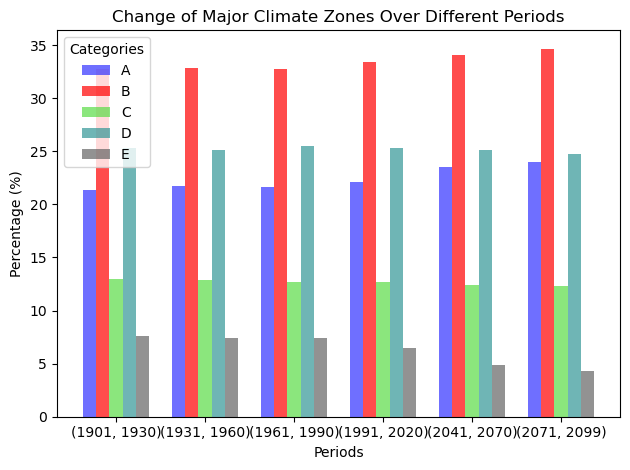

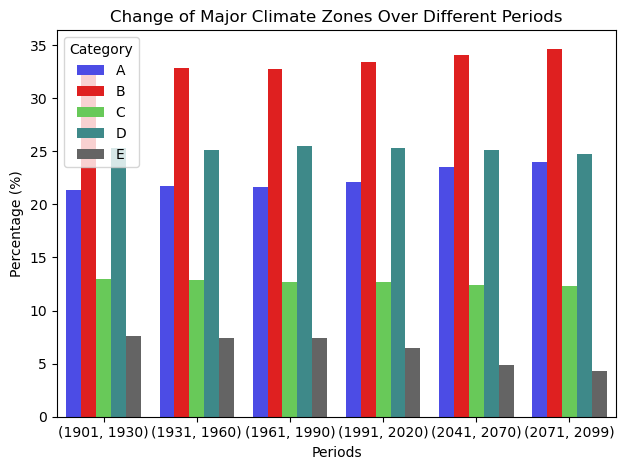

In [79]:
# 1. Using matplotlib:

# Extract data for plotting
periods = koppen_geiger_summary['Period']
values = koppen_geiger_summary[['A', 'B', 'C', 'D', 'E']].values

# Set bar width and positions
bar_width = 0.15
positions = np.arange(len(periods))

# Create the plot
plt.figure()

# Create bars for each category using a for-loop
for i, (category, color) in enumerate(zip(['A', 'B', 'C', 'D', 'E'], colors)):
    plt.bar(positions + i * bar_width, values[:, i], # x & y
            width=bar_width, 
            label=category, 
            color=color)

# Adding labels and title
plt.xlabel('Periods')
plt.ylabel('Percentage (%)')
plt.title('Change of Major Climate Zones Over Different Periods')
plt.xticks(positions + bar_width * 2, periods)  # Adjust to center ticks
plt.legend(title='Categories')

# Show the plot
plt.tight_layout()
plt.show()

# 2. Using seaborn:

# Extract and reshape data for plotting
data = koppen_geiger_summary.melt(id_vars='Period', 
                                   value_vars=['A', 'B', 'C', 'D', 'E'], 
                                   var_name='Category', 
                                   value_name='Percentage')

# Create the seaborn bar plot
plt.figure()
sns.barplot(data=data, 
            x='Period', 
            y='Percentage', 
            hue='Category', 
            palette=colors)

# Adding labels and title
plt.xlabel('Periods')
plt.ylabel('Percentage (%)')
plt.title('Change of Major Climate Zones Over Different Periods')

# Show the plot
plt.tight_layout()
plt.show()

### **Example 6: Temperature anomalies**

[Time series derived from National Oceanic and Atmospheric Administration [NOAA]](https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series) provide valuable insights into global and regional climate trends and variations.

**Exercise:** The folder '../Datasets/noaa_temperature_anomalies' contains regional datasets with temperature anomalies recorded over time. Using seaborn, create a bar plot displaying the temperature anomalies for one selected region (e.g. 'Europe' as choosen in the preparatory code block). After adjusting the layout, save the figure to the "Figures" folder. Utilize the `RdBu_r` color palette, which is already normalized for plotting the colors in the range of anomaly values (use the variable 'colors' from the preparatory code block). This palette provides a diverging color scale, with red representing positive anomalies and blue representing negative anomalies.

Preparation:

In [87]:
# Define the file path for the European dataset
path = '../Datasets/noaa_temperature_anomalies/Europe.csv'

# Load European data and compute annual mean anomalies
anomalies = pd.read_csv(path, skiprows=4)

# Convert the 'Date' column to datetime format
anomalies['Date'] = pd.to_datetime(anomalies['Date'].astype(str), format='%Y%m')
anomalies['Year'] = anomalies['Date'].dt.year  # Extract the year

# Calculate annual mean anomalies
anomalies = anomalies.groupby('Year')['Anomaly'].mean().reset_index()

# Normalize the anomalies for coloring
import matplotlib.colors as mcolors
norm = mcolors.Normalize(vmin=anomalies['Anomaly'].min(), vmax=anomalies['Anomaly'].max())
cmap = plt.get_cmap('RdBu_r')

# Assign colors based on the normalized values
colors = [cmap(norm(value)) for value in anomalies['Anomaly']]

Plot using seaborn:

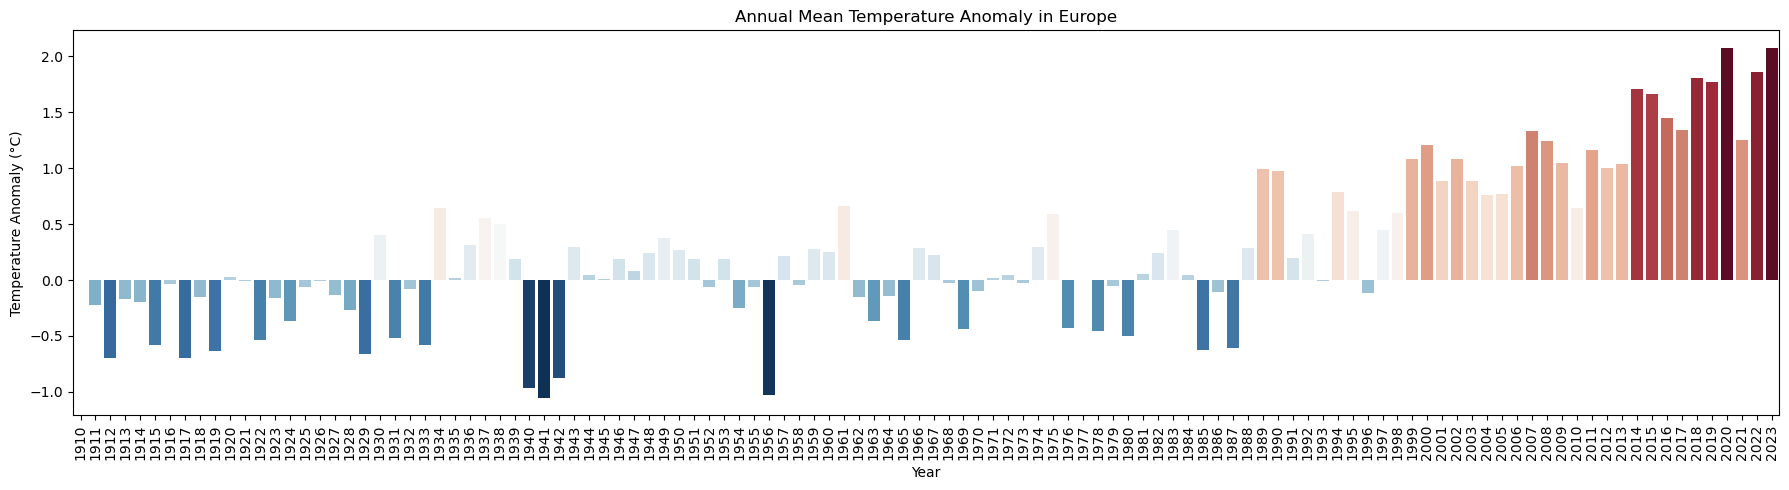

In [88]:
# Plot
plt.figure(figsize=(18, 5))
sns.barplot(data=anomalies, 
            x='Year', 
            y='Anomaly', 
            palette=colors)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Annual Mean Temperature Anomaly in Europe')

# Show the plot
plt.xticks(rotation=90)

plt.tight_layout()

# Save figure to file
plt.savefig('Figures/temperature_anomaly.png', bbox_inches='tight')

plt.show()

## 4. Creative & Custom Plots

Let's be creative and use rectangles to illustrate temperature anomalies! Warming stripes are a popular visual representation of temperature changes over time, using colored stripes where each stripe corresponds to a year and its color indicates the temperature anomaly compared to a baseline average. In the following code, will be used to create these warming stripes. This can be done with rectangles in matplotlib.

To create the stripes using the dataset, annual mean anomalies are calculated from the monthly data.

In [89]:
# Define start and end years
start_year = anomalies['Year'].min()
end_year = anomalies['Year'].max()

Now let's plot the warming stripes for Europe.

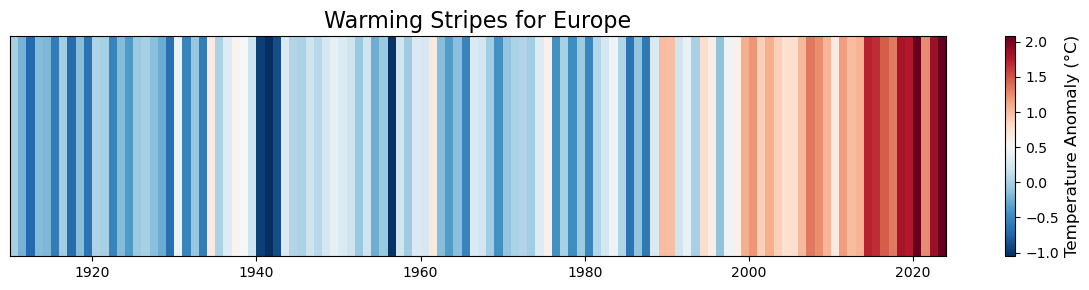

In [83]:
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

# Create the plot
fig, ax = plt.subplots(figsize=(12, 3))

# Set colormap
cmap = 'RdBu_r'

# Create rectangles for warming stripes
rectangles = [Rectangle((year, 0), 1, 1) for year in anomalies['Year']]
rect_coll = PatchCollection(rectangles, zorder=2)
rect_coll.set_array(anomalies['Anomaly'].values)  # Use annual mean anomalies
rect_coll.set_cmap(cmap)
ax.add_collection(rect_coll)

# Set limits and labels
ax.set_ylim(0, 1)
ax.set_xlim(anomalies['Year'].min(), anomalies['Year'].max() + 1)
ax.yaxis.set_visible(False)  # Hide y-axis
ax.set_title('Warming Stripes for Europe', fontsize=16)

# Add colorbar
cbar = plt.colorbar(rect_coll, ax=ax, orientation='vertical')
cbar.set_label('Temperature Anomaly (°C)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()